## Exploratory Data Analysis

In this notebook, I will explore a synthetic dataset generated from credit card data, with a variable "default" which indicates whether the loan has defaulted or not in the following 12 months.

## 0. Import Functions and Preprocess data

In [13]:
import pandas as pd
import numpy as np
import matplotlib as plot
import math
#Import functions from the DataProcessing.py file
from DataProcessing import *

In [3]:
#Import Data
path_to_dataset_original = "../Dataset/exercise_syn_data_original.csv"
original_dataset = pd.read_csv(path_to_dataset_original, sep = ";", decimal=",")

In [4]:
#Preprocess data 
original_dataset = ReplaceNullValues(original_dataset) #Replace Unknown values (-1, -999) with NaNs
original_dataset = EncodeColumn(original_dataset, 'LivingStatus') #Encode the LivingStatus Variable
original_dataset = EncodeColumn(original_dataset, 'EmploymentStatus') #Enconde the EmploymentStatus variable
original_dataset = totalTransactionsColumn(original_dataset) #Sum all columns of type "amount_transaction_typeX" to obtain the total amount spent 
original_dataset = oneHotEncode(original_dataset) #One-hot encode the LivingStatus and EmploymentStatus columns


#Display the encoding for LivingStatus and Employment
display(original_dataset[['LivingStatus', 'LivingStatus_Coded']].drop_duplicates().sort_values('LivingStatus_Coded'))
display(original_dataset[['EmploymentStatus', 'EmploymentStatus_Coded']].drop_duplicates().sort_values('EmploymentStatus_Coded'))

,LivingStatus,LivingStatus_Coded
2,At Parents,0
6,Other,1
1,Owner,2
7,Renter,3
0,Unknown,4


,EmploymentStatus,EmploymentStatus_Coded
15,Civil servants/governmental,0
8,Employee,1
23,Executive civil servant,2
2,Executive employee,3
79,Housewife,4
6,Other,5
7,Retiree/pensioner,6
1,Self-employed/freelancer,7
221,Student,8
10,Unemployed,9


# 1. Data Analysis

## 1.1 Data description
##### Calculation of counts, mean, variance and quartils for all numeric columns

In [4]:
original_dataset.describe()

,default,MonthlyIncome,external_score_1,external_score_2,time_to_first_trx,time_to_activation,opening_balance,closing_balance,amount_transaction_type1,amount_transaction_type2,...,Employee,Executive civil servant,Executive employee,Housewife,OtherEmployment,Retiree/pensioner,Self-employed/freelancer,Student,Unemployed,UnknownEmployment
count,5000.000000,4079.000000,4407.000000,4635.000000,5000.000000,4994.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.046200,2115.108850,488.437940,528.015102,88.527000,36.899479,-469.531034,-526.852500,-13.523342,-0.403728,...,0.354400,0.033000,0.120600,0.014000,0.05100,0.092800,0.070000,0.032600,0.018000,0.163400
std,0.209939,870.182751,78.802304,270.979661,166.703858,104.911936,599.044725,675.537528,116.201965,7.572923,...,0.478379,0.178654,0.325694,0.117502,0.22002,0.290181,0.255173,0.177605,0.132964,0.369767
min,0.000000,1000.000000,250.000000,79.000000,9.000000,1.000000,-5081.780000,-4901.760000,-4155.300000,-191.420000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1500.000000,452.000000,327.000000,25.000000,10.000000,-666.730000,-805.805000,-7.467500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2000.000000,511.000000,488.000000,39.000000,15.000000,-293.380000,-313.525000,-0.210000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2500.000000,544.000000,665.000000,71.000000,28.000000,-57.920000,-45.857500,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,6001.000000,637.000000,1999.000000,1686.000000,1654.000000,4108.040000,2677.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Number of defaults 


<Axes: title={'center': 'Default Frequency'}, xlabel='default', ylabel='Relative Frequency'>

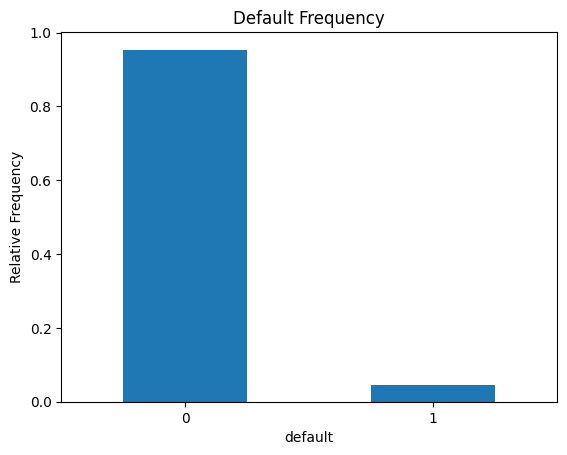

In [5]:
original_dataset['default'].value_counts(normalize = True).plot(kind = 'bar', rot = 0, title = 'Default Frequency', xlabel= 'default', ylabel = 'Relative Frequency')

#~95% default
#~5% default

#### No Default vs Default - data description

##### Calculation of counts, mean, variance and quartils for all numeric columns in No Default data vs Default data

In [6]:
pd.options.display.max_columns = 46
print('No Default Data:')
display(original_dataset[original_dataset['default'] == 0].describe())
print("Default Data:")
display(original_dataset[original_dataset['default'] == 1].describe())

No Default Data:


,default,MonthlyIncome,external_score_1,external_score_2,time_to_first_trx,time_to_activation,opening_balance,closing_balance,amount_transaction_type1,amount_transaction_type2,amount_transaction_type3,amount_transaction_type4,amount_transaction_type5,amount_transaction_type6,amount_transaction_type7,amount_transaction_type8,amount_transaction_type9,amount_transaction_type10,amount_transaction_type11,amount_transaction_type12,amount_transaction_type13,amount_transaction_type14,amount_transaction_type15,...,amount_turnover_betting,amount_turnover_cash,amount_turnover_money_transfer,repayment_amount,LivingStatus_Coded,EmploymentStatus_Coded,total_amount_transaction,At Parents,OtherLiving,Owner,Renter,UnknownLiving,Civil servants/governmental,Employee,Executive civil servant,Executive employee,Housewife,OtherEmployment,Retiree/pensioner,Self-employed/freelancer,Student,Unemployed,UnknownEmployment
count,4769.0,3899.000000,4222.000000,4427.000000,4769.000000,4764.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.00000,4769.000000,4769.000000,...,4769.000000,4769.000000,4769.000000,4091.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000
mean,0.0,2124.783021,492.304121,523.371132,89.883414,36.836062,-468.404452,-527.137440,-12.736804,-0.423284,-0.456037,-2.403143,-1.181388,-7.758446,-7.220250,-68.310489,-21.926515,-94.774110,-93.338184,-3.738572,-0.50862,-22.785309,-5.820644,...,-17.211703,-77.375645,-6.599287,221.560870,2.563221,4.183477,-344.268935,0.080101,0.037744,0.281610,0.439925,0.160621,0.050744,0.356469,0.034179,0.116167,0.014049,0.051164,0.094988,0.069197,0.033969,0.018662,0.160411
std,0.0,879.440134,76.294423,269.557682,169.142548,106.013352,602.238509,678.168415,112.135958,7.753666,8.584507,43.056704,22.342592,67.073421,71.724196,165.072454,91.766658,241.969512,271.155601,36.400510,14.90504,169.149944,41.898500,...,146.254928,254.247364,101.994020,351.901704,1.059987,3.475720,580.453255,0.271477,0.190596,0.449832,0.496430,0.367219,0.219498,0.479006,0.181708,0.320459,0.117706,0.220355,0.293230,0.253815,0.181169,0.135343,0.367025
min,0.0,1000.000000,250.000000,79.000000,9.000000,1.000000,-5081.780000,-4901.760000,-4155.300000,-191.420000,-262.670000,-1384.810000,-632.220000,-1846.340000,-1981.650000,-2972.710000,-2212.070000,-3553.200000,-6220.000000,-1579.950000,-755.07000,-5020.000000,-1085.000000,...,-3480.000000,-3980.000000,-3090.000000,0.000000,0.000000,0.000000,-7905.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1500.000000,461.000000,326.000000,25.000000,9.000000,-672.370000,-810.510000,-7.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-68.080000,0.000000,-79.300000,-20.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.970000,2.000000,1.000000,-445.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,2000.000000,513.000000,488.000000,39.000000,15.000000,-287.210000,-308.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,77.340000,3.000000,3.000000,-120.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,2500.000000,546.000000,656.000000,71.000000,28.000000,-50.680000,-41.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,

Default Data:


,default,MonthlyIncome,external_score_1,external_score_2,time_to_first_trx,time_to_activation,opening_balance,closing_balance,amount_transaction_type1,amount_transaction_type2,amount_transaction_type3,amount_transaction_type4,amount_transaction_type5,amount_transaction_type6,amount_transaction_type7,amount_transaction_type8,amount_transaction_type9,amount_transaction_type10,amount_transaction_type11,amount_transaction_type12,amount_transaction_type13,amount_transaction_type14,amount_transaction_type15,...,amount_turnover_betting,amount_turnover_cash,amount_turnover_money_transfer,repayment_amount,LivingStatus_Coded,EmploymentStatus_Coded,total_amount_transaction,At Parents,OtherLiving,Owner,Renter,UnknownLiving,Civil servants/governmental,Employee,Executive civil servant,Executive employee,Housewife,OtherEmployment,Retiree/pensioner,Self-employed/freelancer,Student,Unemployed,UnknownEmployment
count,231.0,180.000000,185.000000,208.000000,231.000000,230.000000,231.000000,231.000000,231.000000,231.0,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0,231.000000,231.000000,...,231.000000,231.000000,231.000000,160.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,1.0,1905.555556,400.205405,626.855769,60.523810,38.213043,-492.789351,-520.969913,-29.761429,0.0,0.0,-0.155671,-12.374892,-0.809177,-4.561861,-23.496840,-5.443550,-24.464935,-88.778961,-1.044286,0.0,-18.971255,-14.079134,...,-12.367965,-89.573680,-12.727273,174.271625,2.515152,4.471861,-224.037229,0.160173,0.056277,0.103896,0.467532,0.212121,0.038961,0.311688,0.008658,0.212121,0.012987,0.047619,0.047619,0.086580,0.004329,0.004329,0.225108
std,0.0,602.111946,83.643336,282.739170,100.531146,78.871920,529.443104,620.055084,180.362361,0.0,0.0,1.669370,132.704676,5.934308,35.582687,81.106685,23.634553,68.106531,214.674919,7.179220,0.0,95.889801,150.309124,...,67.160150,229.055894,137.625545,303.886202,1.324841,3.578661,430.340731,0.367563,0.230956,0.305788,0.500028,0.409698,0.193922,0.464189,0.092846,0.409698,0.113464,0.213421,0.213421,0.281829,0.065795,0.065795,0.418561
min,1.0,1000.000000,251.000000,144.000000,10.000000,2.000000,-4027.160000,-4068.050000,-2018.240000,0.0,0.0,-17.980000,-1429.300000,-74.300000,-500.000000,-707.110000,-150.000000,-539.960000,-1220.000000,-63.990000,0.0,-936.000000,-1618.940000,...,-535.000000,-1498.650000,-2000.000000,0.000000,0.000000,0.000000,-2578.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1500.000000,322.000000,402.750000,22.500000,12.000000,-507.805000,-607.200000,-8.435000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-7.765000,0.000000,-11.955000,-50.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,-45.000000,0.000000,24.905000,2.000000,1.000000,-175.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,2000.000000,399.000000,598.000000,33.000000,17.000000,-380.320000,-386.980000,-4.880000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,60.000000,3.000000,3.000000,-49.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,2000.000000,463.000000,816.750000,59.000000,34.000000,-180.980000,-173.885000,-1.260000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,150.000000,3.000000,7.000000,-13.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

#### With the information we have gathered so far, we already can make some conclusions
- Only a small percentage of loans are defaulted - less than 5 %;
- We have 5000 data points, out of which only 231 are default situations;
- Comparing default population with non-default population, we can see differences in some features. For example, the average income in the non-default population is higher, which makes sense. This will be further explored below. 

## 1.2 Feature Exploration


### 1.2.1 Monthly Income

Text(0.5, 0.98, '')

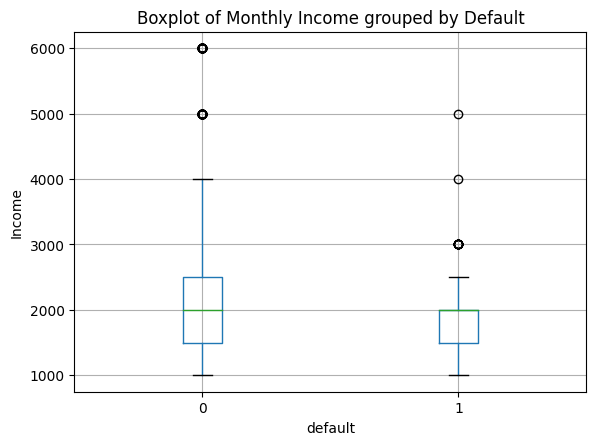

In [7]:
plt = original_dataset.boxplot(column = ['MonthlyIncome'], by = 'default')
plt.set_title('Boxplot of Monthly Income grouped by Default')
plt.set_ylabel('Income')
plt.get_figure().suptitle('')

#plt.title('Boxplot of MonthlyIncome grouped by default')

- Monthly income tends to be higher in the non default population

#### 1.2.2 External_score_1

Text(0.5, 0.98, '')

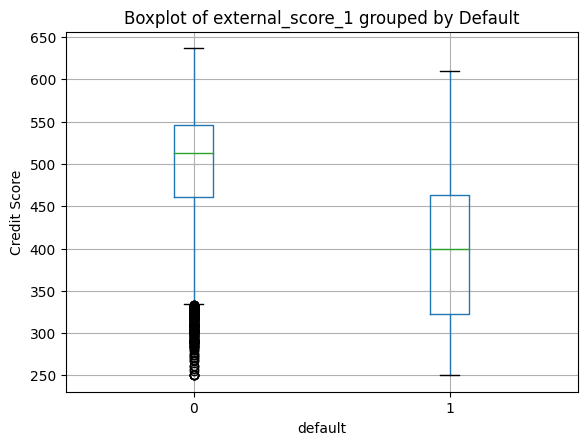

In [8]:
plt = original_dataset.boxplot(column = ['external_score_1'], by = 'default')
plt.set_title('Boxplot of external_score_1 grouped by Default')
plt.set_ylabel('Credit Score')
plt.get_figure().suptitle('')


- For the external_score_1, we see that the default population has on average a much lower credit score than the non-default population. 
- This is important, since it means that external_score_1 might be an important feature when trying to predict the probability of default

#### 1.2.3 External_score_2

Text(0.5, 0.98, '')

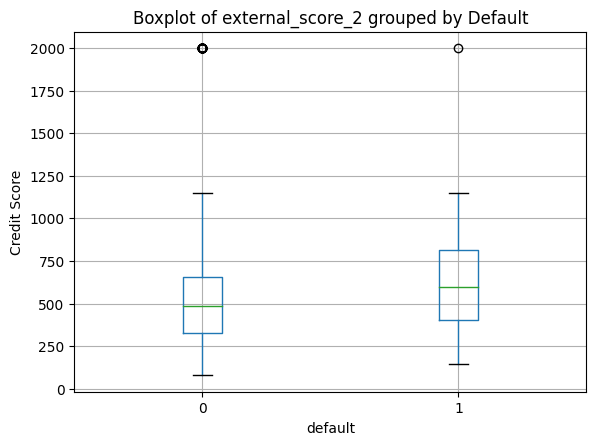

In [9]:
plt = original_dataset.boxplot(column = ['external_score_2'], by = 'default')
plt.set_title('Boxplot of external_score_2 grouped by Default')
plt.set_ylabel('Credit Score')
plt.get_figure().suptitle('')
#plt.title('Boxplot of MonthlyIncome grouped by default')

- Despite the fact that credit scores should rate the quality of the loan, in the case of external_score_2, the data presented does not show this. 
- The external_score_2 seems to be higher in the default population.

#### 1.2.4 Time to first transaction and time to card activation

Text(0, 0.5, 'time (days)')

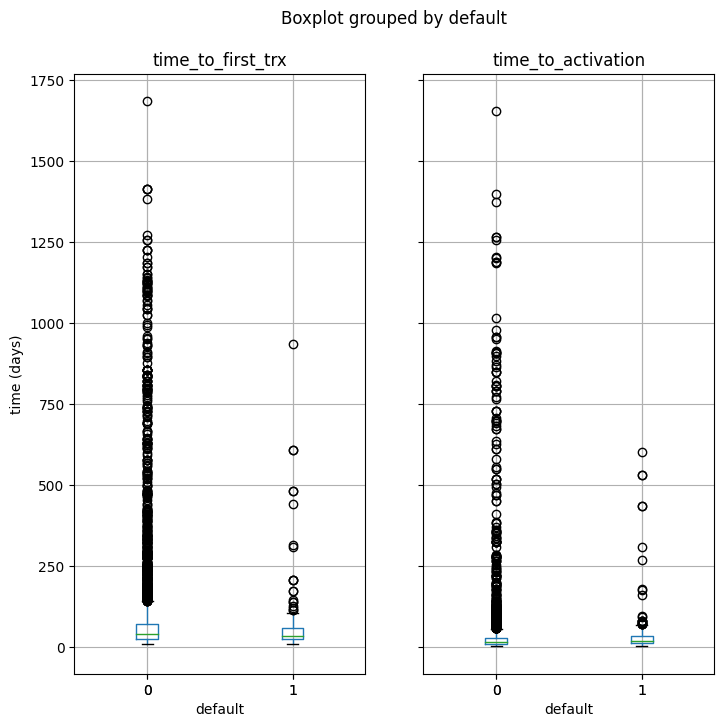

In [10]:
plt = original_dataset.boxplot(column = ['time_to_first_trx', 'time_to_activation'], by = 'default', figsize = (8,8))
plt[0].set_ylabel('time (days)')

#### Same plot with Zoom

(0.0, 100.0)

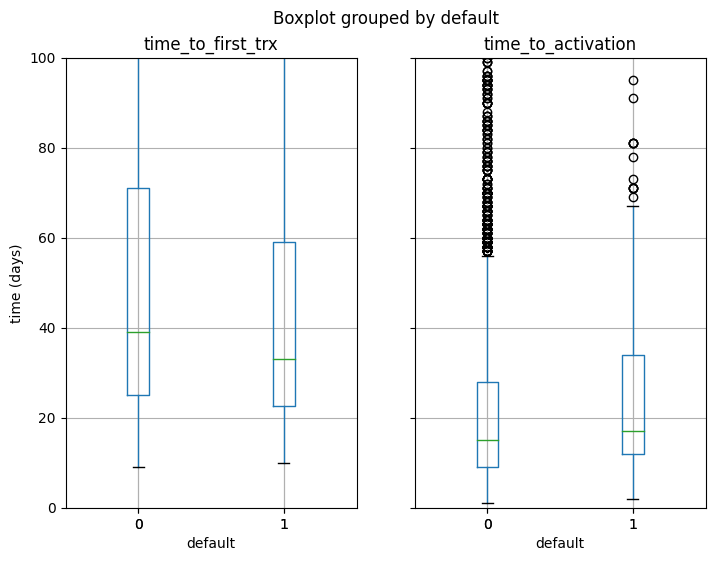

In [11]:
plt = original_dataset.boxplot(column = ['time_to_first_trx', 'time_to_activation'], by = 'default', figsize = (8,6))
plt[0].set_ylabel('time (days)')
plt[0].set_ylim(0,100)
plt[1].set_ylim(0,100)

- Time for the first transaction tends to be lower in the default population. 
- On the other hand, time to activation in the default population is slightly higher. 

#### 1.2.5 Opening and Closing Balance

Text(0, 0.5, 'balance')

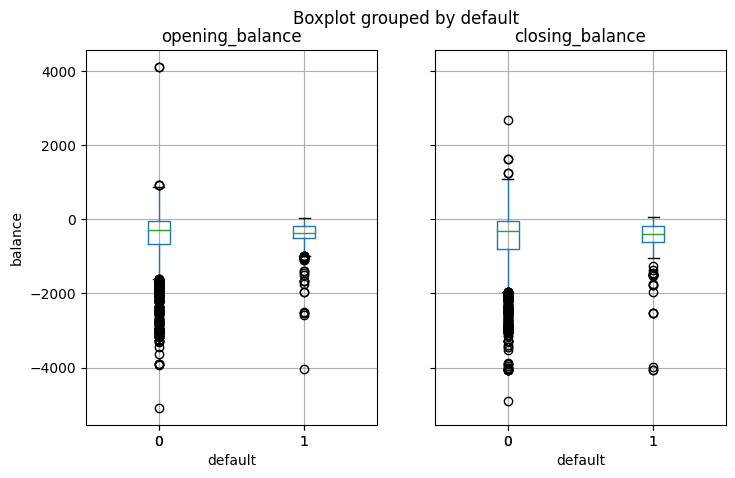

In [12]:
plt = original_dataset.boxplot(column = ['opening_balance', 'closing_balance'], by = 'default', figsize=(8,5))
plt[0].set_ylabel('balance')


#### 1.2.6 Amount Turnover

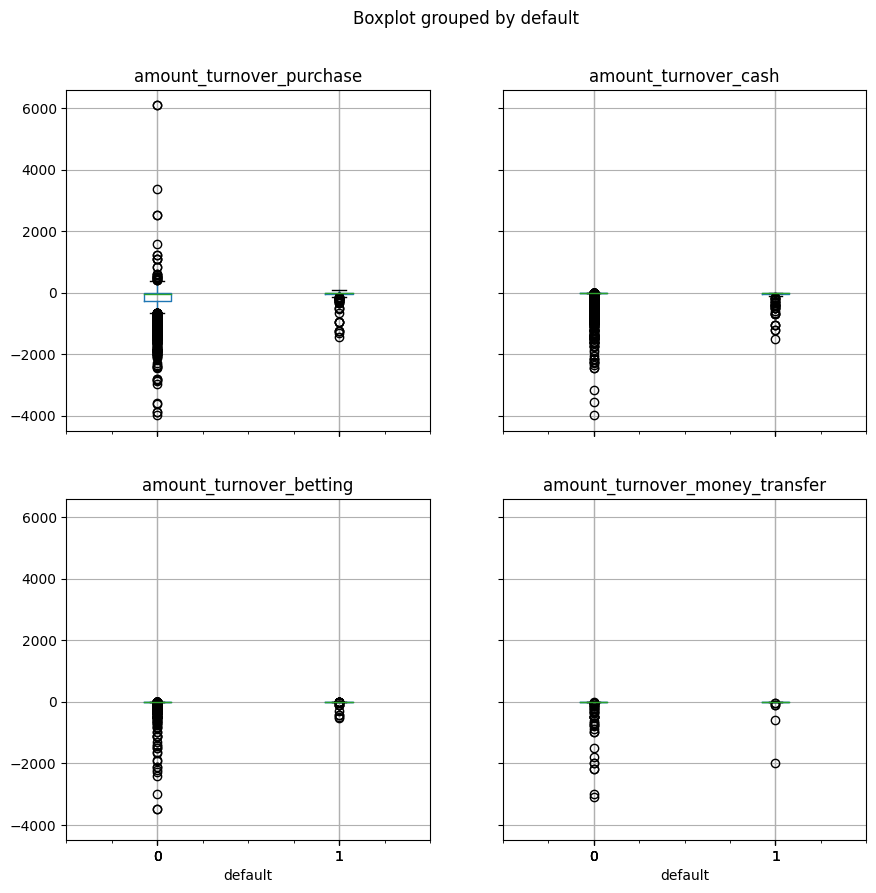

In [13]:
plt = original_dataset.boxplot(column = ['amount_turnover_purchase', 'amount_turnover_cash', 'amount_turnover_betting', 'amount_turnover_money_transfer' ], by = 'default', figsize=(10,10))


- Higher betting values are correlated with less loan defaults. This is very unexpected.

#### 1.2.7 	amount_transaction_type

In [14]:
transaction_type_list = [ ('amount_transaction_type'+ str(x+1)) for x in range(16)] 

pd.options.display.max_columns = 46
print('No Default Data:')
display(original_dataset[transaction_type_list][original_dataset['default'] == 0].describe())
print("Default Data:")
display(original_dataset[transaction_type_list][original_dataset['default'] == 1].describe())

No Default Data:


,amount_transaction_type1,amount_transaction_type2,amount_transaction_type3,amount_transaction_type4,amount_transaction_type5,amount_transaction_type6,amount_transaction_type7,amount_transaction_type8,amount_transaction_type9,amount_transaction_type10,amount_transaction_type11,amount_transaction_type12,amount_transaction_type13,amount_transaction_type14,amount_transaction_type15,amount_transaction_type16
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.00000,4769.000000,4769.000000,4769.000000
mean,-12.736804,-0.423284,-0.456037,-2.403143,-1.181388,-7.758446,-7.220250,-68.310489,-21.926515,-94.774110,-93.338184,-3.738572,-0.50862,-22.785309,-5.820644,-0.887140
std,112.135958,7.753666,8.584507,43.056704,22.342592,67.073421,71.724196,165.072454,91.766658,241.969512,271.155601,36.400510,14.90504,169.149944,41.898500,8.594582
min,-4155.300000,-191.420000,-262.670000,-1384.810000,-632.220000,-1846.340000,-1981.650000,-2972.710000,-2212.070000,-3553.200000,-6220.000000,-1579.950000,-755.07000,-5020.000000,-1085.000000,-219.450000
25%,-7.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-68.080000,0.000000,-79.300000,-20.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


Default Data:


,amount_transaction_type1,amount_transaction_type2,amount_transaction_type3,amount_transaction_type4,amount_transaction_type5,amount_transaction_type6,amount_transaction_type7,amount_transaction_type8,amount_transaction_type9,amount_transaction_type10,amount_transaction_type11,amount_transaction_type12,amount_transaction_type13,amount_transaction_type14,amount_transaction_type15,amount_transaction_type16
count,231.000000,231.0,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0,231.000000,231.000000,231.000000
mean,-29.761429,0.0,0.0,-0.155671,-12.374892,-0.809177,-4.561861,-23.496840,-5.443550,-24.464935,-88.778961,-1.044286,0.0,-18.971255,-14.079134,-0.095238
std,180.362361,0.0,0.0,1.669370,132.704676,5.934308,35.582687,81.106685,23.634553,68.106531,214.674919,7.179220,0.0,95.889801,150.309124,1.447494
min,-2018.240000,0.0,0.0,-17.980000,-1429.300000,-74.300000,-500.000000,-707.110000,-150.000000,-539.960000,-1220.000000,-63.990000,0.0,-936.000000,-1618.940000,-22.000000
25%,-8.435000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-7.765000,0.000000,-11.955000,-50.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,-4.880000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,-1.260000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


- Since we have no context in what each transaction type represent, it is harder to analyse this data;
- However, we can see there are clear differences between default and no default population behaviour;
- For example, amount_transaction_type2 and amount_transaction_type3 is always 0 in the default population;
- This data might be important in the modelling stage. 

#### 1.2.8 Repayment Amount

Text(0.5, 0.98, '')

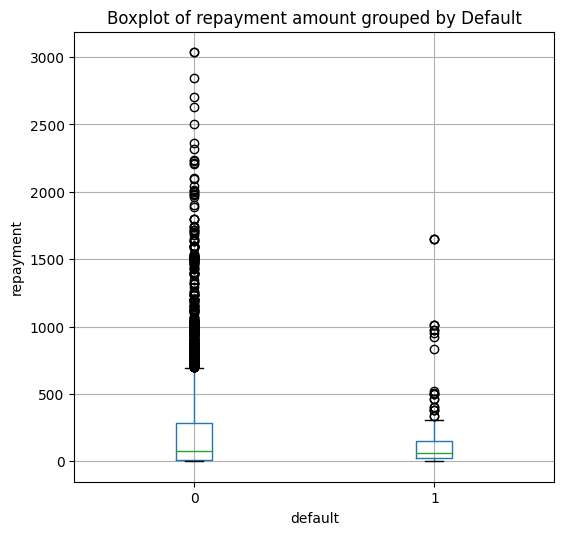

In [15]:
plt = original_dataset.boxplot(column = ['repayment_amount' ], by = 'default', figsize=(6,6))
plt.set_title('Boxplot of repayment amount grouped by Default')
plt.set_ylabel('repayment')
plt.get_figure().suptitle('')


- Population with no default tends to have higher values for the repayment amount feature

#### 1.2.9 Total transactions

Text(0.5, 0.98, '')

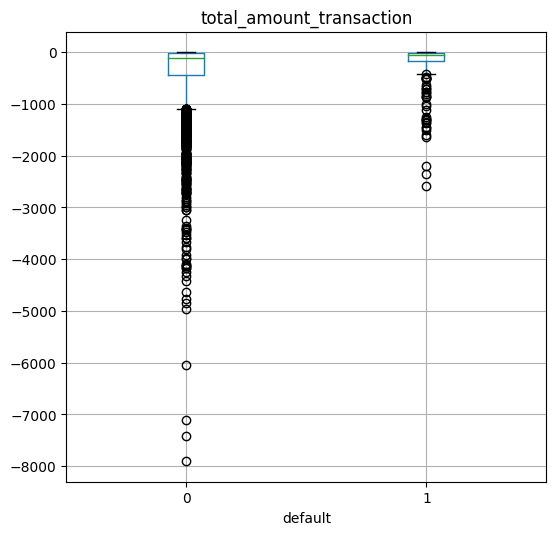

In [16]:
plt = original_dataset.boxplot(column = ['total_amount_transaction' ], by = 'default', figsize=(6,6))
plt.get_figure().suptitle('')


- Population with no default tends to have higher absolute values for the total_amount_transaction feature. 
- Reminder: This feature is the sum of all amount_transaction_typeX features.

#### 1.2.10 Living Status

Text(0.5, 1.0, 'Relative Frequency of Living Status, grouped by default')

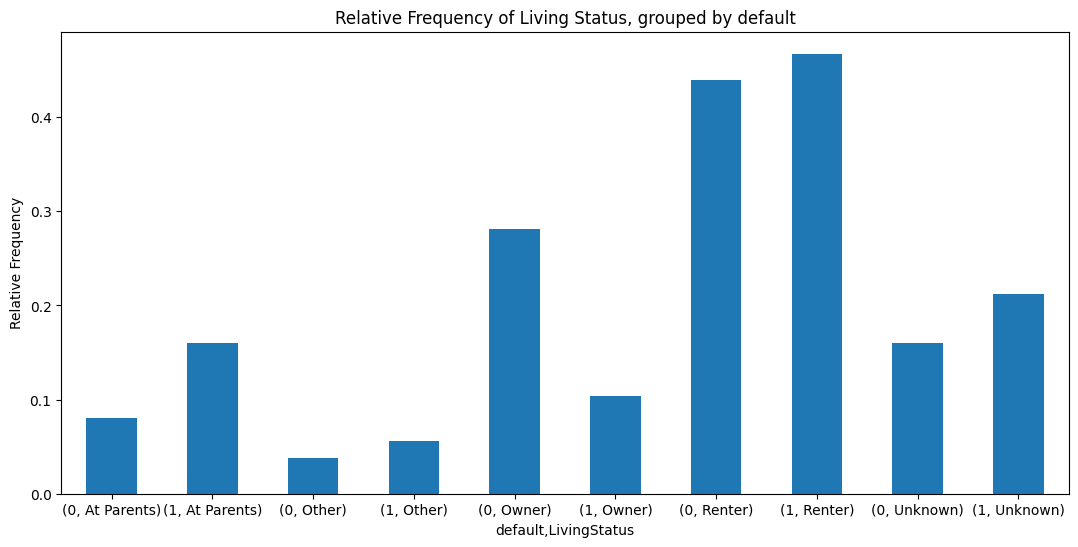

In [17]:
plt = original_dataset.groupby(['default'])['LivingStatus'].value_counts(normalize=True).sort_index(level = 'LivingStatus').plot(kind = 'bar', rot = 0, figsize = (13, 6))
plt.set_ylabel('Relative Frequency')
plt.set_title('Relative Frequency of Living Status, grouped by default')


- Some living status categories are correlated with more defaults, namely, the At Parents, and the Renter category. 
- On the other hand, Owners are less likely to have defaults

#### 1.2.11 Employment Status

Text(0.5, 1.0, 'Relative Frequency of employment status, grouped by default')

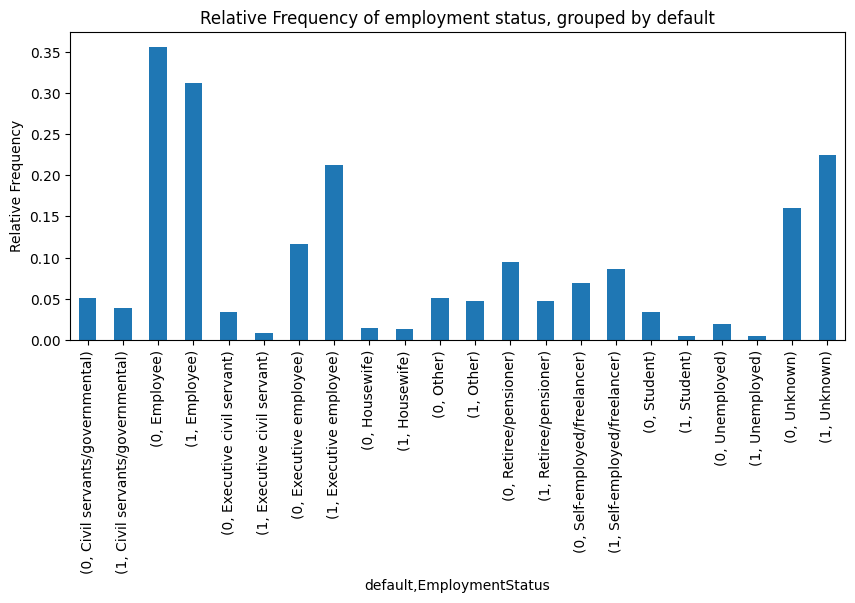

In [18]:
## 1.2.10 Living Status
plt = original_dataset.groupby(['default'])['EmploymentStatus'].value_counts(normalize=True).sort_index(level = 'EmploymentStatus').plot(kind = 'bar', figsize = (10, 4))
plt.set_ylabel('Relative Frequency')
plt.set_title('Relative Frequency of employment status, grouped by default')

- Civil Servents, Employees, Pensioners, Students are less likely to have a default.
- Unemployed are also less likely to have a default. This is strange, since in priciple unemployed people have a much more insecure financial situation. 
- Executive Employees, Freelancers populations are more likely to have a default. 

# 2. Correlation Coeficients

Here I will calculate the Point-biserial correlation coefficient for some of the variables

In [31]:
metrics_all = original_dataset.describe()
metrics_nodefault = original_dataset[original_dataset['default'] == 0].describe()
metrics_default = original_dataset[original_dataset['default'] == 1].describe()
n0 = len(original_dataset[original_dataset['default'] == 0])
n1 = len(original_dataset[original_dataset['default'] == 1])
ncoef = math.sqrt(n1*n0/((n1+n0)**2))

listColumns = ['MonthlyIncome', 'external_score_1', 'external_score_2', 'time_to_first_trx', 'time_to_activation', 'repayment_amount', 'At Parents', 'Renter', 'UnknownLiving', 'OtherLiving', 'Owner', 'Civil servants/governmental', 'Employee',
       'Executive civil servant', 'Executive employee', 'Housewife', 'OtherEmployment', 'Retiree/pensioner', 'Self-employed/freelancer','Student', 'Unemployed', 'UnknownEmployment']

pbCorrelation = {}
for column in listColumns:
       std = metrics_all.iloc[2,:][column]
       mean0 = metrics_nodefault.iloc[1,:][column]
       mean1 = metrics_default.iloc[1,:][column]
       coef = ncoef * (mean1-mean0)/(std)
       pbCorrelation[column] = coef


pbCorrelation

{'MonthlyIncome': -0.05288519864465766,
 'external_score_1': -0.24533770832226612,
 'external_score_2': 0.08016574541560817,
 'time_to_first_trx': -0.03697040377122231,
 'time_to_activation': 0.0027551979328892906,
 'repayment_amount': -0.028338339731094352,
 'At Parents': 0.06065582347092152,
 'Renter': 0.01167063540395619,
 'UnknownLiving': 0.029265869972721886,
 'OtherLiving': 0.020193571118837933,
 'Owner': -0.08369155325305665,
 'Civil servants/governmental': -0.011326797060543708,
 'Employee': -0.019650201858883828,
 'Executive civil servant': -0.029987122346918957,
 'Executive employee': 0.06184488321330646,
 'Housewife': -0.0018973624315538672,
 'OtherEmployment': -0.0033819700297516714,
 'Retiree/pensioner': -0.0342672116781142,
 'Self-employed/freelancer': 0.014300301524131368,
 'Student': -0.03503306682312464,
 'Unemployed': -0.022628566584610668,
 'UnknownEmployment': 0.036728821523838294}